In [ ]:
import pandas as pd
import numpy as np

from os import listdir
from os.path import isfile, join

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/CAX_Train1/'

In [ ]:
PH_data_two = pd.DataFrame()

In [ ]:
files = [f for f in listdir(file_path) if isfile(join(file_path, f))]
for idy, file_iter in enumerate(files):
    print ("File no " + str(idy) + " of "+ str(len(files)))
    data = pd.read_csv('/content/drive/MyDrive/CAX_Train1/'+ file_iter)
    PH_two = data['PH'] == 2
    PH_data_two = PH_data_two.append(data[PH_two])

File no 0 of 200
File no 1 of 200
File no 2 of 200
File no 3 of 200
File no 4 of 200
File no 5 of 200
File no 6 of 200
File no 7 of 200
File no 8 of 200
File no 9 of 200
File no 10 of 200
File no 11 of 200
File no 12 of 200
File no 13 of 200
File no 14 of 200
File no 15 of 200
File no 16 of 200
File no 17 of 200
File no 18 of 200
File no 19 of 200
File no 20 of 200
File no 21 of 200
File no 22 of 200
File no 23 of 200
File no 24 of 200
File no 25 of 200
File no 26 of 200
File no 27 of 200
File no 28 of 200
File no 29 of 200
File no 30 of 200
File no 31 of 200
File no 32 of 200
File no 33 of 200
File no 34 of 200
File no 35 of 200
File no 36 of 200
File no 37 of 200
File no 38 of 200
File no 39 of 200
File no 40 of 200
File no 41 of 200
File no 42 of 200
File no 43 of 200
File no 44 of 200
File no 45 of 200
File no 46 of 200
File no 47 of 200
File no 48 of 200
File no 49 of 200
File no 50 of 200
File no 51 of 200
File no 52 of 200
File no 53 of 200
File no 54 of 200
File no 55 of 200
Fi

In [ ]:
PH_data_two.to_pickle('PH_data_two.df')

In [ ]:

import pandas as pd
import numpy as np

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

import pickle
import itertools

In [ ]:
pickle_file = open("PH_data_two.df", "rb")

In [ ]:
training_data = pd.read_pickle('PH_data_two.df')

In [ ]:
training_data

,ACID,Flight_instance_ID,Year,Month,Day,Hour,Minute,Second,ABRK,ELEV_1,...,BPGR_2,BPYR_1,BPYR_2,CALT,CASS,CRSS,DFGS,DWPT,EAI,FF
30,676,676200405111519,2004,5,11,15,18,48,119.983559,21.540257,...,34.179775,53.711075,0.0,0,132.0,35.947010,1,131472,0,264
31,676,676200405111519,2004,5,11,15,18,49,119.983559,21.928959,...,29.296949,53.711075,0.0,0,132.0,35.947010,1,131472,0,274
32,676,676200405111519,2004,5,11,15,18,50,119.983559,22.051704,...,34.179775,53.711075,0.0,0,132.0,35.947010,1,131472,0,302
33,676,676200405111519,2004,5,11,15,18,51,119.983559,22.031246,...,29.296949,58.593899,0.0,0,132.0,35.947010,1,131472,0,346
34,676,676200405111519,2004,5,11,15,18,52,119.983559,22.153999,...,29.296949,53.711075,0.0,0,132.0,35.947010,1,131472,0,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4064,676,676201003140736,2002,3,14,8,43,14,119.924973,18.553387,...,39.062599,2998.054443,0.0,0,120.0,61.962448,1,32,0,782
4065,676,676201003140736,2002,3,14,8,43,15,119.910324,18.471558,...,34.179775,3002.937256,0.0,0,120.0,61.962448,1,32,0,686
4066,676,676201003140736,2002,3,14,8,43,16,119.924973,18.410183,...,34.179775,3002.937256,0.0,0,120.0,61.962448,1,32,0,298
4067,676,676201003140736,2002,3,14,8,43,17,119.924973,18.307892,...,29.296949,3002.937256,0.0,0,120.0,61.962448,1,32,0,290


In [ ]:
feature_columns = [col for col in training_data.columns if not (col=='FF' or col=='Flight_instance_ID' or  col=='ACID')]

y = training_data['FF'].values
X = training_data[feature_columns].values

In [ ]:
X = StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = VarianceThreshold(threshold=0.0).fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

# **Random Forest**

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['AOA1_Max' 'AOAI_Max' 'SPLG' 'FQTY_1' 'RUDD_Min' 'AOA1_Min' 'RUDD_Mean'
 'ALT_Max' 'AOAI_Min' 'PT_Max' 'BAL1_Mean' 'WD_Max' 'ALTR_Mean' 'PH'
 'WS_Max' 'LATP' 'MSQT_1_Min' 'MSQT_1_Max' 'WD_Mean' 'MSQT_2_Min' 'OIPL'
 'FADF' 'MSQT_1_Mean' 'ILSF' 'MSQT_2_Mean' 'OIT_2' 'SAT' 'EVNT'
 'AOA2_Mean' 'SMKB' 'VIB_1_Max' 'HYDY' 'OIT_3' 'RALT_Max' 'ALT_Min'
 'CASM_Mean' 'CAS_Max' 'ALT_Mean' 'PTRM' 'SMOK' 'MACH_Mean' 'LONG_Max'
 'CAS_Min' 'TOCW_Max' 'FQTY_4' 'PUSH' 'TAS_Max' 'HDGS' 'LONG_Min' 'ABRK'
 'Year' 'TH_Mean' 'FQTY_3' 'TAS_Min' 'SPLY' 'PS_Min' 'BAL1_Max' 'FIRE_3'
 'PS_Mean' 'WAI_2' 'CASM_Min' 'TAT' 'TRK_Max' 'NSQT_Max' 'N1T_Min'
 'BAL2_Mean' 'TAI' 'PI_Max' 'MACH_Max' 'NSQT_Mean' 'CASM_Max' 'GS_Max'
 'Month' 'GS_Min' 'PI_Mean' 'AOA2_Max' 'TMAG' 'CCPC_Mean' 'APUF_Mean'
 'TRKM_Mean' 'AOA2_Min' 'CWPC_Min' 'BAL1_Min' 'MACH_Min' 'CWPC_Max'
 'DA_Min' 'DA_Max' 'N1T_Mean' 'CCPC_Min' 'AOAC_Mean' 'PSA_Min' 'CWPF_Mean'
 'LATG_Mean' 'CWPF_Min' 'Hour' 'Second' 'PT_Mean' 'FIRE_1' 'TOCW_Mean'
 'WAI_1' 'SHKR

In [ ]:
print(np.argsort(rfr.feature_importances_))

[121 130  52  18 102 120 101 115 129 100 131 184 116  44 187  30  84  85
 182  87  38  10  83  29  86  40  48   9 122  49 181  28  41 190 114 140
 139 113  46  50 155 154 138 112  21  47 169  24 153   6   0 170  20 168
  53  93 133  15  92  67 141  57 175 166 162 134  56  91 157 164 142 148
   1 147  89 124  59  71  68 176 123  78 132 156  79 144 145 161  72 125
  96  80 149  81   3   5  98  13 110  66 107 105  73  90 103  58  77 165
 117 143  64  69 174  22  27 118 158 108  95  70  61 111  42 136 180  99
 163 119  60  43  65  97  76 104  17 146  75 189  63  55  88  32 106  25
  51 177  94  74 192   7  39  62   4 179  45  37  33  19 135  82  35 178
 185 109  54 160   8 152  36   2  11 159 188 186  23  26  12  14 171 173
 137 183 191 172  16 151 126 167 150 127  34  31 128]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 92.5701063468765


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.9843542612097391


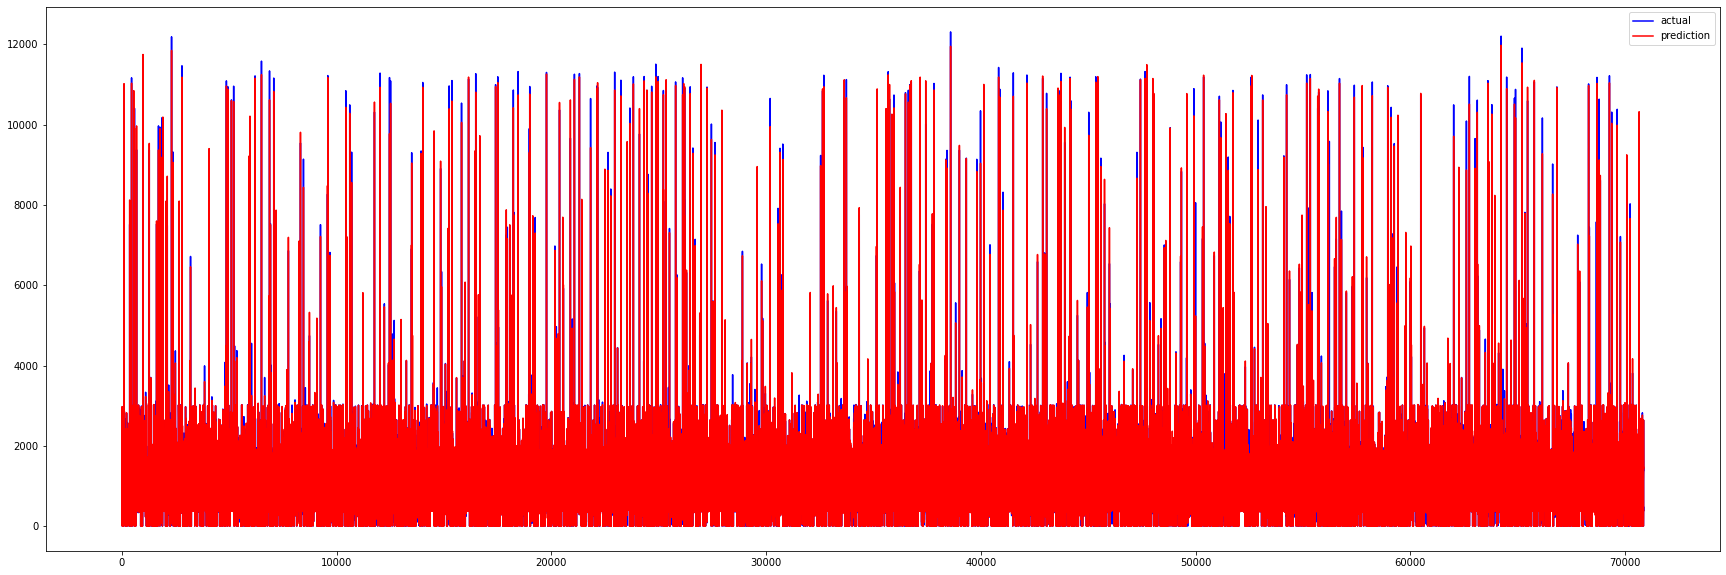

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()


# **GRADIENT BOOSTING REGRESSOR**

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rfr = GradientBoostingRegressor(n_estimators=10, random_state= 0 )

In [ ]:
rfr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['Year' 'ALTR_Max' 'AOA1_Mean' 'AOA1_Min' 'AOA1_Max' 'AOA2_Mean'
 'AOA2_Min' 'AOA2_Max' 'AOAC_Mean' 'AOAI_Min' 'AOAI_Max' 'BAL1_Mean'
 'BAL1_Min' 'BAL1_Max' 'BAL2_Mean' 'BAL2_Max' 'CAS_Mean' 'CAS_Min'
 'CAS_Max' 'CASM_Mean' 'ALTR_Min' 'CASM_Min' 'ALTR_Mean' 'ALT_Min'
 'PS_Max' 'PSA_Mean' 'ROLL_Mean' 'PSA_Max' 'PT_Mean' 'PT_Min' 'PT_Max'
 'RUDD_Mean' 'RUDD_Min' 'RUDD_Max' 'RUDP_Mean' 'RUDP_Min' 'SHKR_Mean'
 'SHKR_Min' 'SHKR_Max' 'TOCW_Mean' 'TOCW_Min' 'TOCW_Max' 'ALT_Mean'
 'ALT_Max' 'PS_Min' 'CASM_Max' 'DA_Min' 'TH_Mean' 'TH_Min' 'TRK_Min'
 'TRK_Max' 'TRKM_Mean' 'TRKM_Min' 'TRKM_Max' 'VIB_1_Mean' 'VIB_1_Min'
 'VIB_1_Max' 'WD_Mean' 'WD_Min' 'WD_Max' 'WS_Mean' 'WS_Min' 'WS_Max'
 'RALT_Mean' 'RALT_Min' 'RALT_Max' 'TAS_Max' 'DA_Mean' 'TAS_Min'
 'NSQT_Min' 'DA_Max' 'GS_Mean' 'GS_Min' 'GS_Max' 'LATG_Mean' 'LATG_Max'
 'LONG_Mean' 'LONG_Min' 'LONG_Max' 'MACH_Mean' 'MACH_Min' 'MACH_Max'
 'MH_Mean' 'MH_Min' 'MH_Max' 'N1T_Mean' 'N1T_Min' 'N1T_Max' 'NSQT_Mean'
 'NSQT_Max' 'PS_Mean' 'PSA_Min' 'PI_M

In [ ]:
print(np.argsort(rfr.feature_importances_))

[  0 118 119 120 121 122 123 124 125 129 130 131 132 133 134 136 137 138
 139 140 117 141 116 114  94  95 191  97  98  99 100 101 102 103 104 105
 107 108 109 110 111 112 113 115  93 142 144 170 171 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 169 143 168 165 145 146
 147 148 149 151 152 153 154 155 156 157 158 159 160 161 162 163 164 166
  92  96  90  26  27  28  29  30  33  34  35  36  37  38  39  40  41  42
  43  44  91  46  25  24  23  22   1   2   3   4   5   6   7   8   9  47
  10  13  14  15  16  17  18  19  20  21  11  48  45  50  49  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  68
  67  69  65  51  52  53  54  55  56  57  66  59 192  61  64  63  60  62
  58 106  32 135  12 172 167 173 126 127 150  31 128]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 355.968579454745


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.7686455374533318


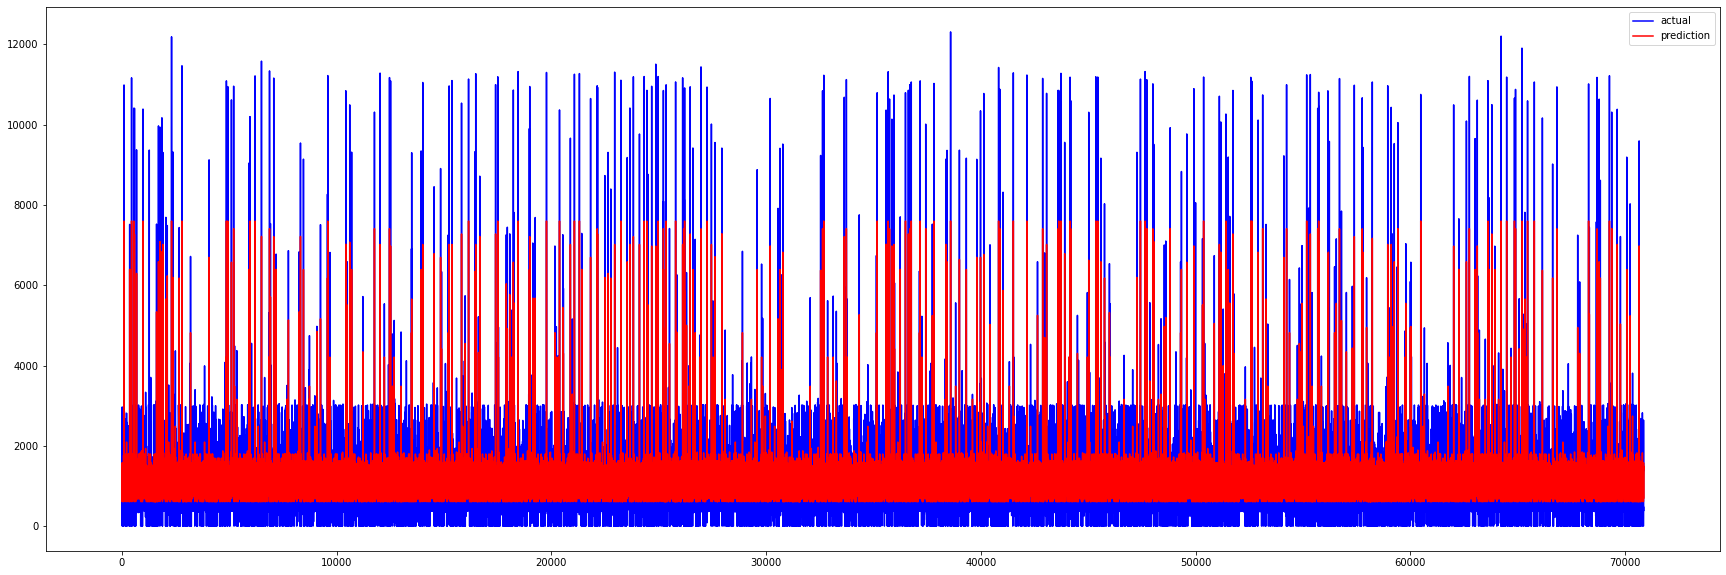

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

# **K NEAREST NEIGHBOURS**

In [ ]:
from sklearn import neighbors

In [ ]:
rfr = neighbors.KNeighborsRegressor(n_neighbors =20 )

In [ ]:
rfr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:

y_pred = rfr.predict(X_val)

In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 238.01441321465626


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.896566537305775


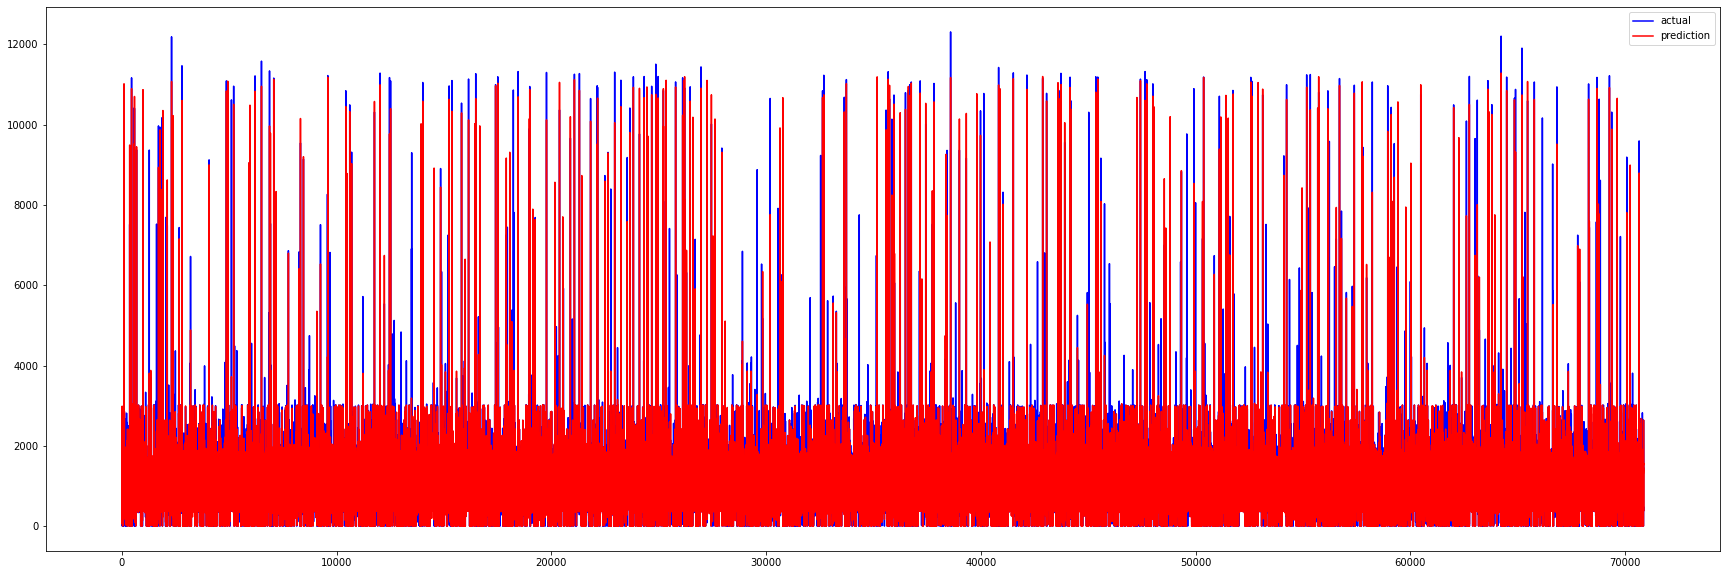

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

**ANN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu',input_shape=(193,)))
                                                                                         
                                                                                         
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
regressor.add(Dense( 1, kernel_initializer = 'glorot_uniform', activation = 'linear'))

# Compiling the ANN
regressor.compile(optimizer = RMSprop(0.001), loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])


In [ ]:
regressor.fit(X_train,y_train,epochs=25)

Epoch 1/25
5168/5168 [==============================] - 13s 2ms/step - loss: 145.4842 - mean_absolute_error: 145.4842
Epoch 2/25
5168/5168 [==============================] - 13s 3ms/step - loss: 100.6008 - mean_absolute_error: 100.6008
Epoch 3/25
5168/5168 [==============================] - 19s 4ms/step - loss: 83.7224 - mean_absolute_error: 83.7224
Epoch 4/25
5168/5168 [==============================] - 16s 3ms/step - loss: 75.8934 - mean_absolute_error: 75.8934
Epoch 5/25
5168/5168 [==============================] - 13s 2ms/step - loss: 71.5622 - mean_absolute_error: 71.5622
Epoch 6/25
5168/5168 [==============================] - 10s 2ms/step - loss: 68.1099 - mean_absolute_error: 68.1099
Epoch 7/25
5168/5168 [==============================] - 13s 3ms/step - loss: 65.6926 - mean_absolute_error: 65.6926
Epoch 8/25
5168/5168 [==============================] - 13s 2ms/step - loss: 64.0251 - mean_absolute_error: 64.0251
Epoch 9/25
5168/5168 [==============================] - 14s 3ms/step

In [ ]:
y_pred= regressor.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.959091814800319
MSE: 22405.552796626536
RMSE: 149.68484491299222
MAE: 79.75068266082157


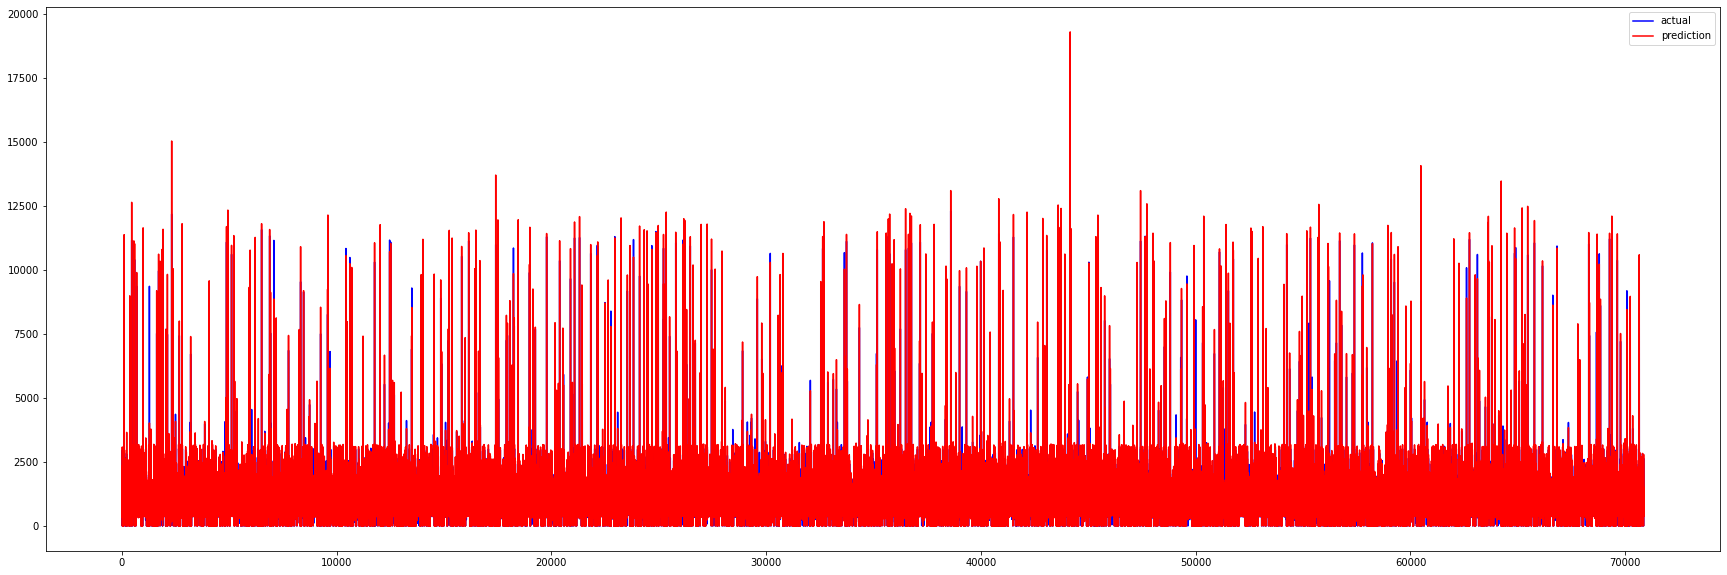

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

**CNN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(193,1)))
model.add(Flatten())


In [ ]:
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 192, 32)           96        
                                                                 
 flatten (Flatten)           (None, 6144)              0         
                                                                 
 dense (Dense)               (None, 64)                393280    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 393,441
Trainable params: 393,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=12,epochs=50, verbose=0)


In [ ]:
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.9702483936730448
MSE: 16295.056431597455
RMSE: 127.65209137181206
MAE: 57.57300761124032


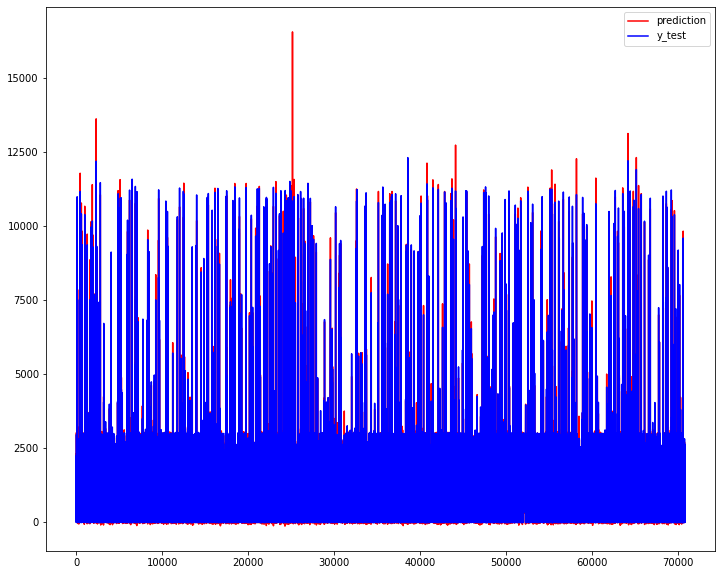

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))
plt.plot(y_pred,c='red',label='prediction')
plt.plot(y_val,c='blue',label='y_test')
plt.legend()
plt.show()